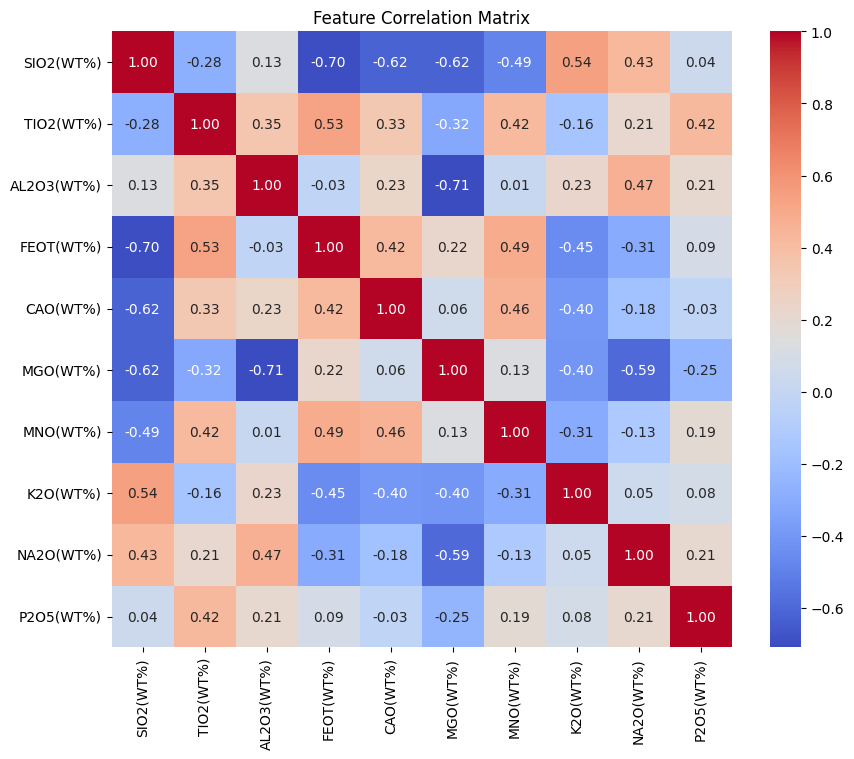

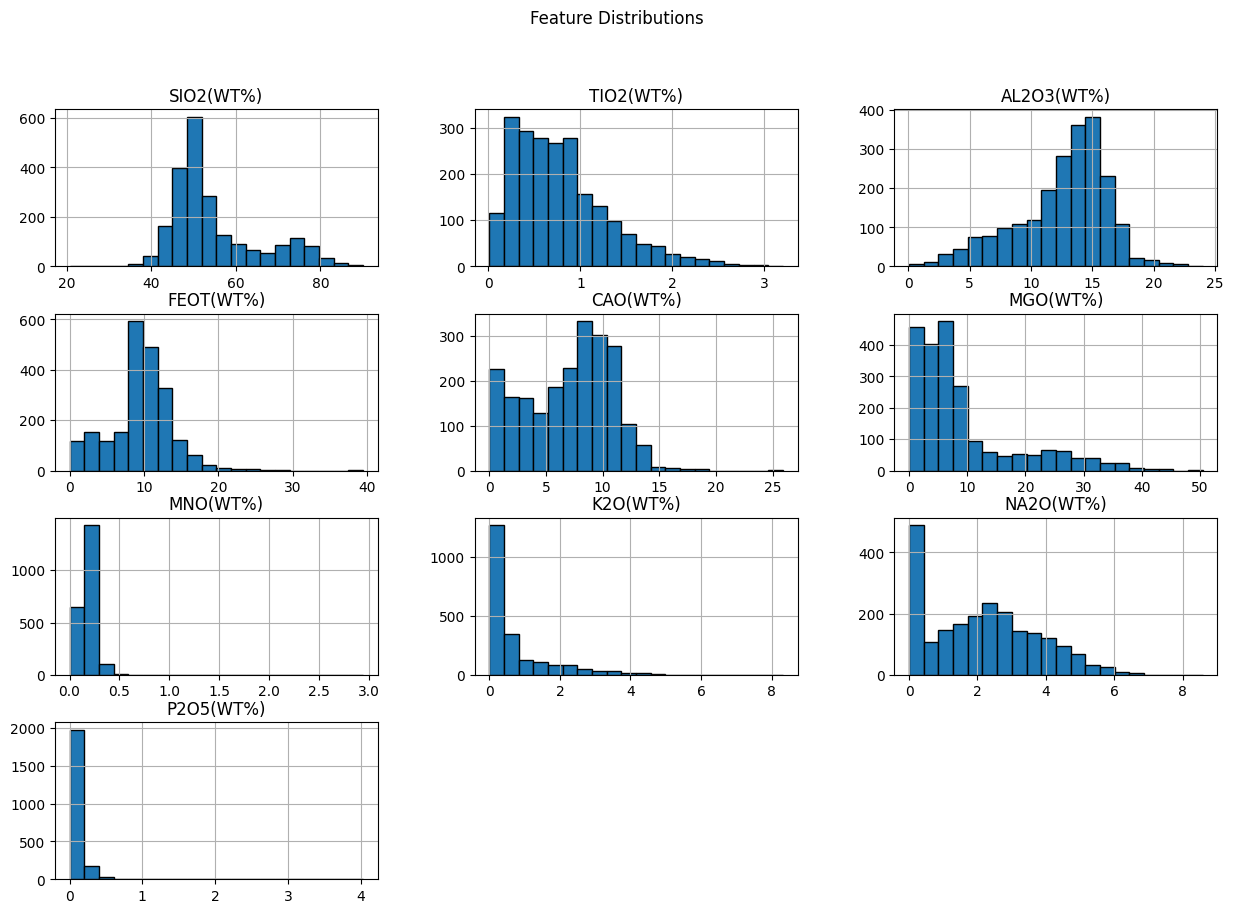

Accuracy: 0.7608
Precision (Weighted): 0.7103
Recall (Weighted): 0.7608
F1 Score (Weighted): 0.7241

Classification Report:

              precision    recall  f1-score   support

    ANDESITE       0.71      0.64      0.67        47
      BASALT       0.69      0.92      0.79       165
      DACITE       0.59      0.62      0.60        21
      GABBRO       0.62      0.23      0.33        22
   KOMATIITE       0.92      0.86      0.89        83
    RHYOLITE       0.91      0.93      0.92        68
   THOLEIITE       0.00      0.00      0.00        33

    accuracy                           0.76       439
   macro avg       0.64      0.60      0.60       439
weighted avg       0.71      0.76      0.72       439



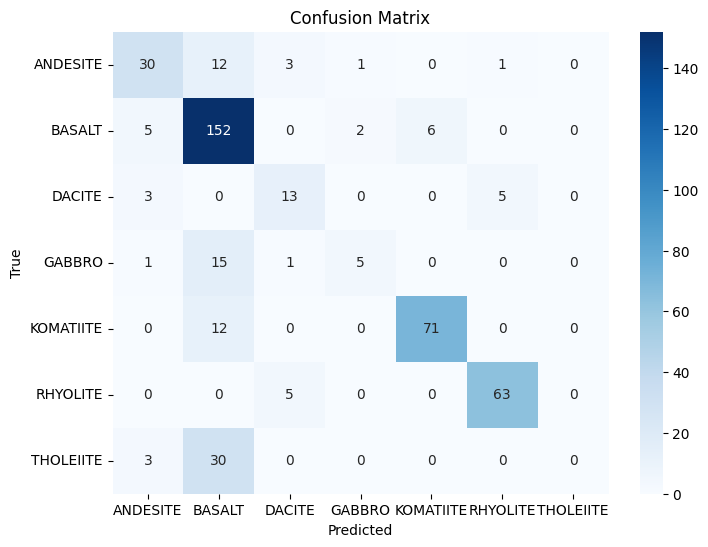

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
file_path = '/mnt/data/multiclass_clean.csv'
data = pd.read_csv("multiclass_clean.csv")

# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data.iloc[:, 1:])

# Encode the target variable (ROCK1)
label_encoder = LabelEncoder()
data['ROCK1_encoded'] = label_encoder.fit_transform(data['ROCK1'])

# Prepare feature matrix (X) and target vector (y)
X = pd.DataFrame(data_imputed, columns=data.columns[1:11])
y = data['ROCK1_encoded']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Feature distribution visualization
X.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Define base learners
svm_clf = SVC(probability=True, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Define stacking model with Logistic Regression as the meta-model
stacking_clf = StackingClassifier(
    estimators=[('svm', svm_clf), ('gb', gb_clf)],
    final_estimator=LogisticRegression(random_state=42)
)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

classification_report_result = classification_report(
    y_test, y_pred, target_names=label_encoder.classes_, zero_division=0
)
# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")
print(f"F1 Score (Weighted): {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report_result)

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
